**Goal of the project**

The use of online activities for commerce, that is, business-to-business (B2B), business-to-consumer(B2C), consumer-to-consumer(C2C) platforms
is pervasive; this is as a result of the ease and potentially large market reach that businesses and consumers have. These e-commerce platforms provide rating or ranking systems that customers use to rate the service received from service providers. The information provided by these customers in their review encodes their emotions regarding their purchase. The reviews and ratings for particular organizations are vital precursors for providing some intelligence in the decision-making process to ensure business growth.

In this notebook, we will classify short text sequences (in our case, tweets) into one of six emotional classes.

**Load and preprocess data**

The dataset I’m using is an [emotion dataset](https://www.kaggle.com/datasets/parulpandey/emotion-dataset) which is ideal for emotion recognition. It includes English language Twitter messages representing six basic emotions- anger, disgust, fear, joy, sadness, and surprise.

We will load the data using the texts_from_csv function. This function expects one column to contain the texts of documents and one or more other columns to store the labels.

Since val_filepath is None, 10% of the data will automatically be used as a validation set.

In [48]:
# Importing libraries
import pandas as pd
import numpy as np
import ktrain
import tensorflow as tf
from ktrain import text

In [49]:
# Load and preprocess data
DATA_PATH = '../input/emotion-dataset/training.csv'

(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH, 'text',
                                                                    label_columns = ['label'],
                                                                    val_filepath = None)

detected encoding: utf-8 (if wrong, set manually)
['label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5']
       label_0  label_1  label_2  label_3  label_4  label_5
637        0.0      0.0      0.0      1.0      0.0      0.0
10960      0.0      0.0      0.0      1.0      0.0      0.0
6585       0.0      0.0      0.0      1.0      0.0      0.0
14033      0.0      0.0      0.0      0.0      0.0      1.0
11632      1.0      0.0      0.0      0.0      0.0      0.0
['label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5']
       label_0  label_1  label_2  label_3  label_4  label_5
7808       0.0      1.0      0.0      0.0      0.0      0.0
13406      0.0      1.0      0.0      0.0      0.0      0.0
10167      0.0      0.0      0.0      1.0      0.0      0.0
363        1.0      0.0      0.0      0.0      0.0      0.0
2828       1.0      0.0      0.0      0.0      0.0      0.0
language: en
Word Counts: 14421
Nrows: 14400
14400 train sequences
train sequence lengths:
	mean

**Build a text classification model**

Having loaded the data, we will now create a text classification model. The print_text_classifiers function prints some available models.

In [50]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [51]:
# Load a fastText model
model = text.text_classifier('fasttext', (x_train, y_train), preproc = preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 400
done.


Next, we load a text classification model and wrap the model and data in Learner object.

In [52]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data = (x_train, y_train), val_data = (x_test, y_test), batch_size = 64)

**Estimate a good learning rate**

Next, we instantiate a Learner object and call the lr_find and lr_plot methods to help identify a good learning rate.

In [53]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 3) 

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
225/225 [==============================] - 2s 5ms/step - loss: 2.5044 - accuracy: 0.1276
Epoch 2/3
225/225 [==============================] - 1s 5ms/step - loss: 2.0095 - accuracy: 0.2426
Epoch 3/3
225/225 [==============================] - 1s 6ms/step - loss: 1.6148 - accuracy: 0.3629


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


Three possible suggestions for LR from plot:
	Longest valley (red): 2.86E-03
	Min numerical gradient (purple): 9.00E-03
	Min loss divided by 10 (omitted from plot): 9.31E-02


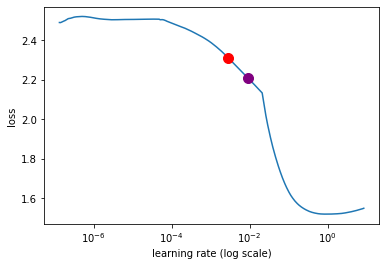

In [54]:
# Visually identify best learning rate
learner.lr_plot(suggest = True)

**Train**

Finally, we will train our model using autofit.

In [55]:
learner.autofit(2.86E-03, early_stopping = 5)

reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.00286...
Epoch 1/1024
225/225 [==============================] - 2s 7ms/step - loss: 1.7638 - accuracy: 0.3306 - val_loss: 1.6521 - val_accuracy: 0.3581
Epoch 2/1024
225/225 [==============================] - 1s 6ms/step - loss: 1.1583 - accuracy: 0.5838 - val_loss: 1.0002 - val_accuracy: 0.7563
Epoch 3/1024
225/225 [==============================] - 1s 6ms/step - loss: 0.7464 - accuracy: 0.7517 - val_loss: 0.4399 - val_accuracy: 0.8644
Epoch 4/1024
225/225 [==============================] - 1s 6ms/step - loss: 0.5238 - accuracy: 0.8275 - val_loss: 0.3279 - val_accuracy: 0.8888
Epoch 5/1024
225/225 [==============================] - 2s 7ms/step - loss: 0.4129 - accuracy: 0.8662 - val_loss: 0.2869 - val_accuracy: 0.8988
Epoch 6/1024
225/225 [==============================] - 1s 6ms/step - loss: 0.3514 - accuracy: 0.8856 - val_loss: 0.2723 - val_accuracy: 0.8988
E

**Making predictions**

In [63]:
y_pred = learner.model.predict(x_test)

**Evaluate model**

Let's compute for ROC-AUC of our final model for identifying text‐based emotions:

In [64]:
from sklearn.metrics import roc_auc_score

In [65]:
# Evaluate model
score = roc_auc_score(y_test, y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.990820 



Our final ROC-AUC score is **0.99**.